# Challenge - Chemicals Segregation
## Can you Separate the chemicals?
## Binary Classification Challenge
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.



### Data Description
You are provided with two files test and train.

### Train:
This files consists of two csv files LogisticXtrain and LogisticYtrain. Xtrain consists of the features whereas Ytrain consists of the labels associated with the features.

### Test:
This file consists of two files LogisticXtest consisting of the features of test data and sample_output which represents in which format your solution csv must be submitted.

You need to implement any classifier from scratch, don't use any sklearn based classifier.

Before submitting please check the list below:

The column names or headers of submission file must match with that given in sample submission file.

Datatype of the columns of submission file must match with that of the given sample_submission file.

The number of rows must be equal to given test cases and number of columns must be equal to the columns given in the sample submission file.

## Scoring & Leaderboard

Maximum Score for this problem is 100 points. You accuracy in classification task rounded off to nearest integer becomes your final score.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
df_x = pd.read_csv('Data/Train/Logistic_X_Train.csv').values
df_y = pd.read_csv('Data/Train/Logistic_Y_Train.csv').values
df_x.shape

(3000, 3)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2)

## Logistic Regression

In [23]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-1*x))

In [24]:
def hypothesis(X, theta):
    """
    X - np array (m,n+1)
    theta - np arrary (n+1, 1)
    """
    return sigmoid( np.dot(X,theta) ) 

In [25]:
def error(X, y, theta):
    """
    params:
        X - np array (m,n+1)
        y - np array (m, 1)
        theta - np arrary (n+1, 1)
    
    return :
        scalar value = loss value
    """

    
    y_hat = hypothesis(X, theta) # (m,1)
    err = (y * np.log(y_hat) + ((1- y) * np.log(1-y_hat)) ).mean()
    
    return -err

In [26]:
def gradient(X, y, theta):
    """
    X - np array (m,n+1)
    y - np array (m, 1)
    theta - np arrary (n+1, 1)
    """
    

    
    y_hat = hypothesis(X, theta)
    grad = np.dot( X.T , (y_hat - y) )
   
    return grad/X.shape[0]

In [27]:
def gradient_descent(X, y, lr =0.5, max_itr = 500):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(max_itr):
        
        err = error(X, y, theta)
        error_list.append(err)
        
        grad = gradient(X, y, theta)
        
        # Updation Rule
        theta = theta - lr*grad
        
    return (theta, error_list)

In [28]:
opt_theta, error_list = gradient_descent(X_train, y_train)

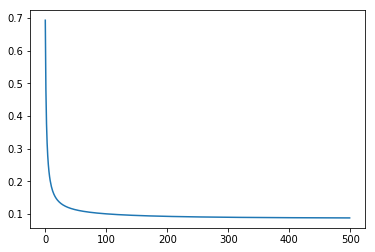

In [29]:
plt.plot(error_list);

In [31]:
y_pred = hypothesis(X_test, opt_theta)

In [32]:
y_pred = np.round(y_pred).astype('int')

In [33]:
# Accuracy
(y_pred == y_test).mean()

0.96

## Checking on the given Test Dataset

In [34]:
X_test = pd.read_csv('Data/Test/Logistic_X_Test.csv').values
y_pred = hypothesis(X_test, opt_theta)
y_pred = np.round(y_pred).astype('int')

In [37]:
df = pd.DataFrame(data = y_pred, columns = ['label'])
df.to_csv('ans.csv', index = False)